# Seaborn FacetGrid

**FacetGrid is basically a grid of subplots.The distribution of a variable or relationship among variables can easily be discovered with FacetGrids. They can have up to three dimensions: row, column, and hue.**

**It takes a categorical feature in the dataset and create one plot for each category of that variable**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
penguins=sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [25]:
sns.set_style('white')

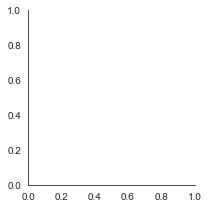

In [26]:
sns.FacetGrid(penguins);

In [27]:
# We can supply either row or column (col) dimensions or both

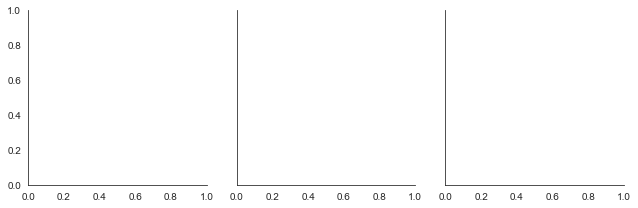

In [28]:
sns.FacetGrid(penguins,col='island');

In [29]:
penguins.island.value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [30]:
# So there were three types of island based on that it has divided into three subplots in three columns

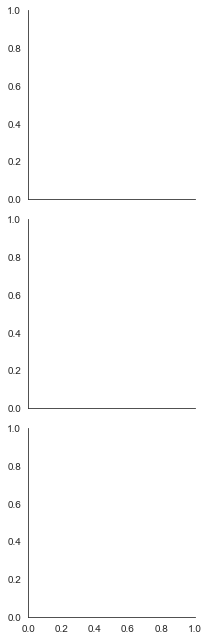

In [31]:
sns.FacetGrid(penguins,row='island');

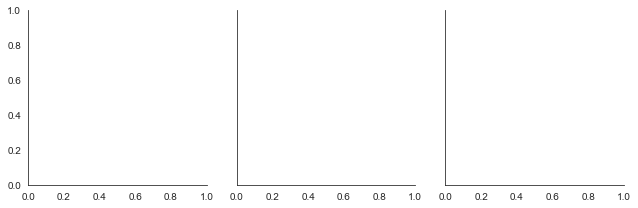

In [32]:
g=sns.FacetGrid(penguins,col='island'); # It returns an object

In [33]:
type(g)

seaborn.axisgrid.FacetGrid

# .map()

**To map some plot into these plots of the FacetGrid**

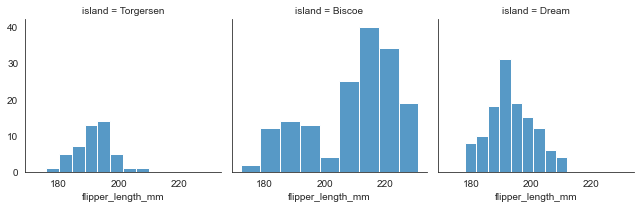

In [34]:
g=sns.FacetGrid(penguins,col='island')
g.map(sns.histplot,'flipper_length_mm');

# .map_dataframe() 

**It is similar to .map() with some basic difference**

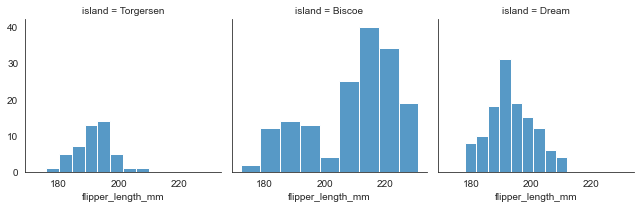

In [35]:
g=sns.FacetGrid(penguins,col='island')
g.map_dataframe(sns.histplot,'flipper_length_mm');

In [36]:
# It is differnt from .map() in the following way as it allows to specify x and y but .map() does not allow

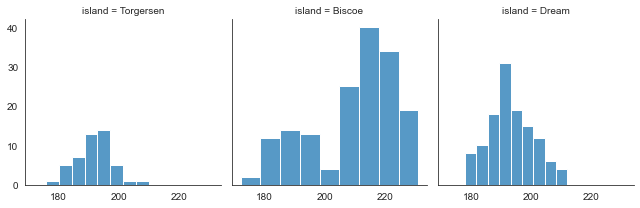

In [37]:
g=sns.FacetGrid(penguins,col='island')
g.map_dataframe(sns.histplot,x='flipper_length_mm');

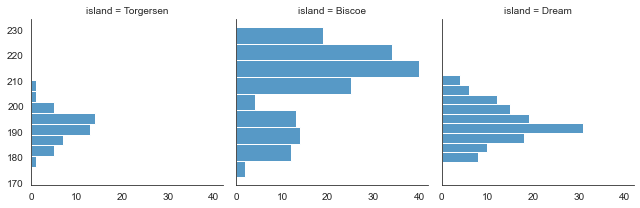

In [38]:
g=sns.FacetGrid(penguins,col='island')
g.map_dataframe(sns.histplot,y='flipper_length_mm');

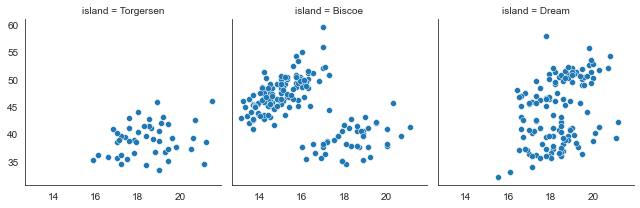

In [43]:
g=sns.FacetGrid(penguins,col='island')
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm');

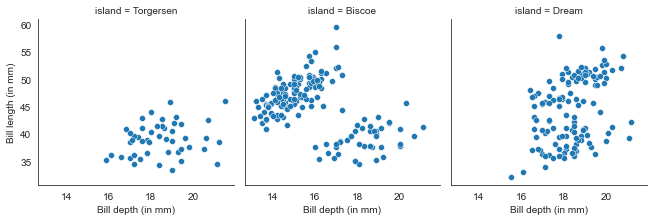

In [46]:
# with the facetgrid object we can use many functions to customize our facetGrid plots
g=sns.FacetGrid(penguins,col='island')
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm')
g.set_axis_labels(x_var='Bill depth (in mm)',y_var='Bill length (in mm)') # This will add x- and y- labels
plt.show()

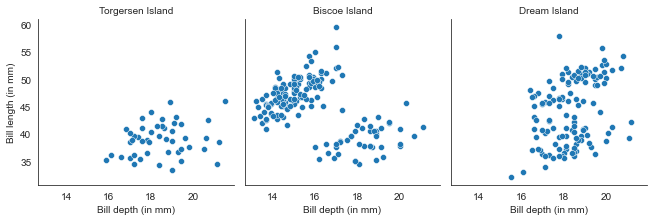

In [50]:
g=sns.FacetGrid(penguins,col='island')
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm')
g.set_axis_labels(x_var='Bill depth (in mm)',y_var='Bill length (in mm)')

g.set_titles(col_template='{col_name} Island');

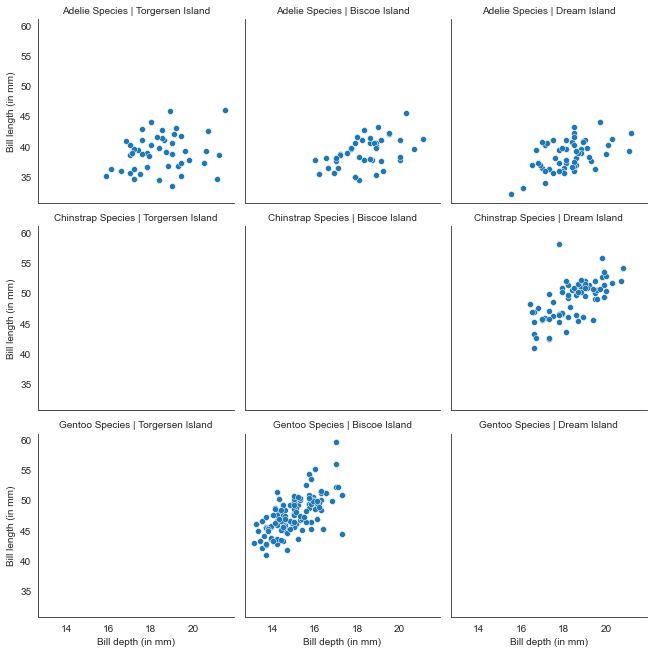

In [54]:
# row as well as the col dimension FacetGrid
g=sns.FacetGrid(penguins,col='island',row='species')
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm')
g.set_axis_labels(x_var='Bill depth (in mm)',y_var='Bill length (in mm)');
g.set_titles(row_template='{row_name} Species',col_template='{col_name} Island');

In [55]:
# Some of the plots are blank because there are no data points available for those row|col combinations

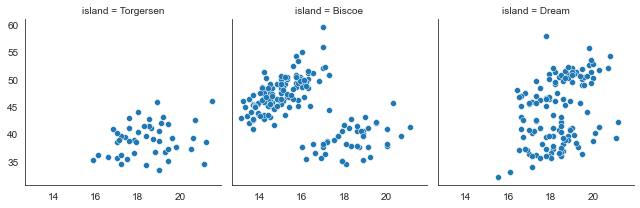

In [56]:
g=sns.FacetGrid(penguins,col='island')
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm');

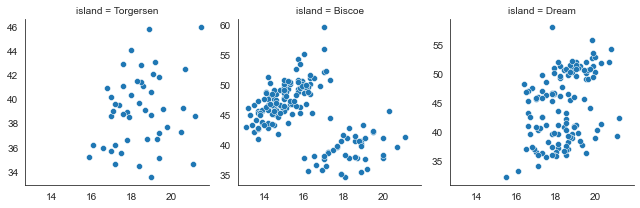

In [57]:
# In the above plot we can see that each column share the same y-axis 
# We can custumize this using 'sharey' parameter

g=sns.FacetGrid(penguins,col='island',sharey=False)
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm');

In [58]:
# Now we can see each col has their own y axis measurements

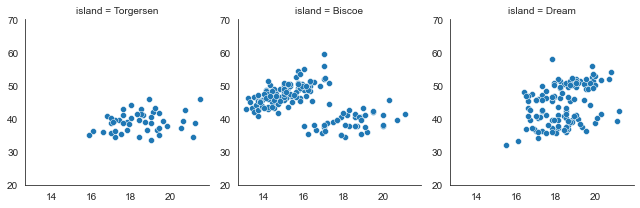

In [60]:
# 'ylim' parameter
g=sns.FacetGrid(penguins,col='island',sharey=False,ylim=(20,70))
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm');

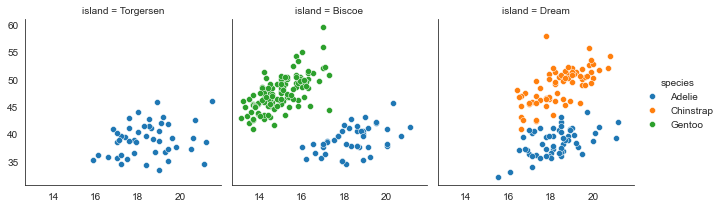

In [62]:
# 'hue' parameter to specify other parameters

g=sns.FacetGrid(penguins,col='island',hue='species')
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm')
g.add_legend();

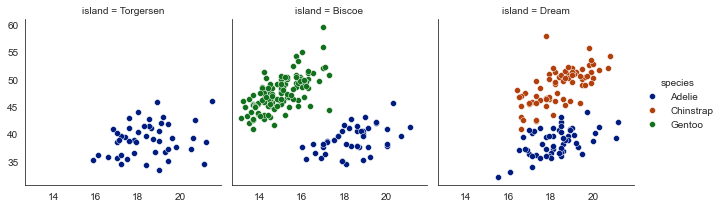

In [64]:
# 'palette' prameter

g=sns.FacetGrid(penguins,col='island',hue='species',palette='dark')
g.map_dataframe(sns.scatterplot,y='bill_length_mm',x='bill_depth_mm')
g.add_legend();

In [73]:
# Apllying custom functions

import numpy as np

def add_mean_line(data,var=None,**kws):
    
    # If no variable is provided then don't add the mean line just return
    if var==None: return
    
    mean=np.mean(data[var])
    
    # Get current axis
    ax=plt.gca()
    
    # Add line at group mean
    ax.axvline(mean,color='maroon',lw=3,ls='--')
    
    # annotate mean group
    x_pos=0.65
    if mean>5000: x_pos=0.2
    
    ax.text(x_pos,0.7,f'mean={mean:.0f} gms',transform=ax.transAxes,color='maroon',fontweight='bold',fontsize=12)
    

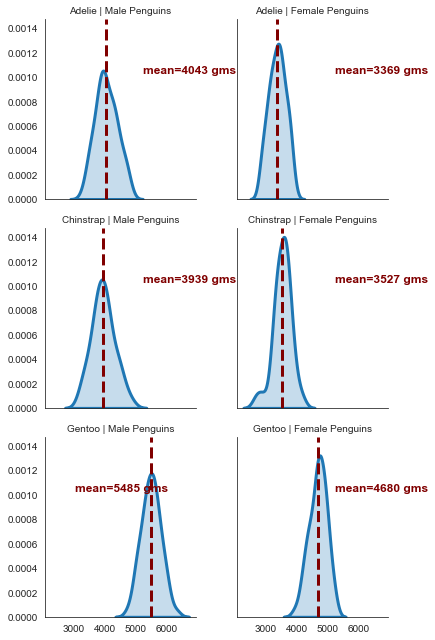

In [74]:
quantity='body_mass_g'

g=sns.FacetGrid(penguins,col='sex',row='species')
g.map_dataframe(sns.kdeplot,x=quantity,lw=3,shade=True)
g.map_dataframe(add_mean_line,var=quantity)
g.set_titles(row_template='{row_name}', col_template='{col_name} Penguins');